In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Imports
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
# Import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [7]:
# Donwload dataset
!kaggle datasets download -d moltean/fruits --unzip

 98%|████████████████████████████████████████▎| 746M/760M [00:04<00:00, 150MB/s]
100%|█████████████████████████████████████████| 760M/760M [00:05<00:00, 159MB/s]


In [5]:
# Batch size
bs = 64

In [6]:
# Creating paths
path = Path('/home/jupyter/ml-lab/notebooks/fruit-classification/fruits-360')
path.ls()

test_path = path/'Test'

In [7]:
# Creating data source
np.random.seed(42)

src = (ImageList.from_folder(path)
      .split_by_rand_pct()
      .label_from_folder()
      .transform(get_transforms(flip_vert=True), size=100)
      .add_test_folder(test_path))

In [8]:
# Creating data bunch
data = src.databunch(bs=bs).normalize(imagenet_stats)

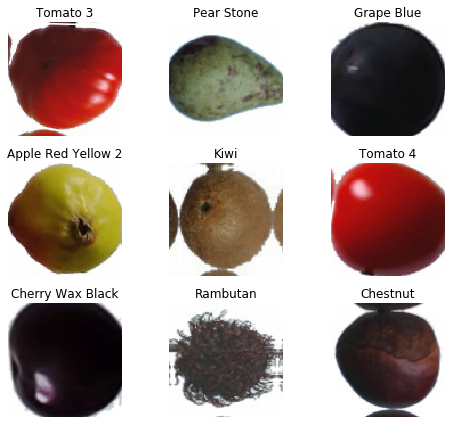

In [10]:
# Showing dome data
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [20]:
# Creating RestNet34 model
learner = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [21]:
# Fit the model
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.208418,0.089873,0.030836,0.969164,32:39
1,0.092823,0.017241,0.005581,0.994419,32:32
2,0.031488,0.004409,0.001326,0.998674,32:18
3,0.019557,0.005534,0.001713,0.998287,32:17


In [22]:
learner.save("stage-1")

In [23]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

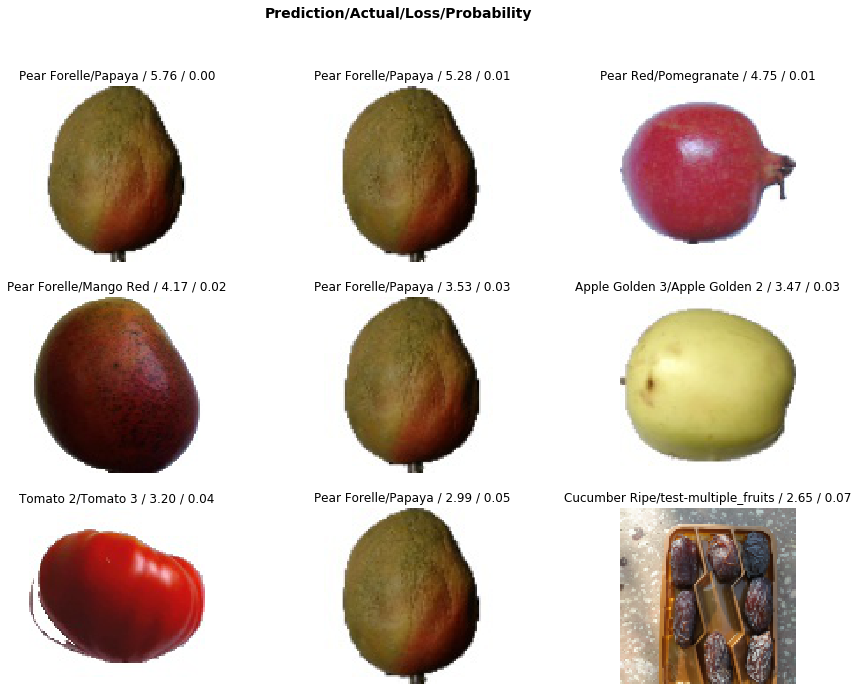

In [24]:
interp.plot_top_losses(9, figsize=(15,11))